# Assignment 2 - Data Preprocessing
### Ahsan Shakoor


- Deadline: Thursday, 20.11.2024



In this assignment, you will preprocess and clean a dataset by handling missing values, correcting inconsistencies, normalizing or encoding features, and removing outliers to prepare it for analysis or modeling. The expected result is a clean, structured dataset ready for further analysis or machine learning._

In [582]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



#### importing Data

In [583]:
df = pd.read_csv(r'Males.csv')

In [584]:
df.sample(5)

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
879,880,1930,1987,11,9,no,other,yes,no,2.148761,Finance,Sales_Workers,north_east
4223,4224,12084,1987,12,12,no,other,no,no,1.665860,Manufacturing,Laborers_and_farmers,rural_area
657,658,1345,1981,12,5,no,other,yes,no,-0.723919,Trade,"Craftsmen, Foremen_and_kindred",south
4310,4311,12420,1986,12,9,yes,other,yes,no,2.243297,Mining,"Professional, Technical_and_kindred",NaN
1137,1138,2413,1981,12,5,yes,other,no,no,2.190017,Trade,"Managers, Officials_and_Proprietors",NaN


In [585]:
df.shape

(4360, 13)

In [586]:
df.duplicated().sum()

0

In [587]:
df.isnull().sum()

rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

In [588]:
df['residence'].value_counts()

residence
south              1333
nothern_central     964
north_east          733
rural_area           85
Name: count, dtype: int64

In [590]:
df.isnull().sum()

rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

In [591]:
df['residence'].value_counts()

residence
south              1333
nothern_central     964
north_east          733
rural_area           85
Name: count, dtype: int64

#### Dropping extra Columns

In [592]:
df = df.drop(['rownames', 'nr'], axis=1)
# df = df.drop(['rownames'], axis=1)

In [593]:
df.describe()

,year,school,exper,wage
count,4360.000000,4360.000000,4360.000000,4360.000000
mean,1983.500000,11.766972,6.514679,1.649147
std,2.291551,1.746181,2.825873,0.532609
min,1980.000000,3.000000,0.000000,-3.579079
25%,1981.750000,11.000000,4.000000,1.350717
50%,1983.500000,12.000000,6.000000,1.671143
75%,1985.250000,12.000000,9.000000,1.991086
max,1987.000000,16.000000,18.000000,4.051860


In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        4360 non-null   int64  
 1   school      4360 non-null   int64  
 2   exper       4360 non-null   int64  
 3   union       4360 non-null   object 
 4   ethn        4360 non-null   object 
 5   maried      4360 non-null   object 
 6   health      4360 non-null   object 
 7   wage        4360 non-null   float64
 8   industry    4360 non-null   object 
 9   occupation  4360 non-null   object 
 10  residence   3115 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 374.8+ KB


In [596]:
df.nunique()

year             8
school          13
exper           19
union            2
ethn             3
maried           2
health           2
wage          3631
industry        12
occupation       9
residence        4
dtype: int64

In [597]:
df[['union', 'ethn', 'maried', 'health', 'industry', 'occupation', 'residence']].nunique()

union          2
ethn           3
maried         2
health         2
industry      12
occupation     9
residence      4
dtype: int64

In [598]:
print(df['union'].value_counts())
print(df['ethn'].value_counts())
print(df['maried'].value_counts())
print(df['health'].value_counts())
print(df['industry'].value_counts())


union
no     3296
yes    1064
Name: count, dtype: int64
ethn
other    3176
hisp      680
black     504
Name: count, dtype: int64
maried
no     2446
yes    1914
Name: count, dtype: int64
health
no     4286
yes      74
Name: count, dtype: int64
industry
Manufacturing                       1231
Trade                               1169
Professional_and_Related Service     333
Business_and_Repair_Service          331
Construction                         327
Transportation                       286
Public_Administration                175
Finance                              161
Agricultural                         140
Personal_Service                      73
Mining                                68
Entertainment                         66
Name: count, dtype: int64


####  relation between industry and occupation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Business_and_Repair_Service'),
  Text(1, 0, 'Personal_Service'),
  Text(2, 0, 'Trade'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Professional_and_Related Service'),
  Text(7, 0, 'Finance'),
  Text(8, 0, 'Entertainment'),
  Text(9, 0, 'Public_Administration'),
  Text(10, 0, 'Agricultural'),
  Text(11, 0, 'Mining')])

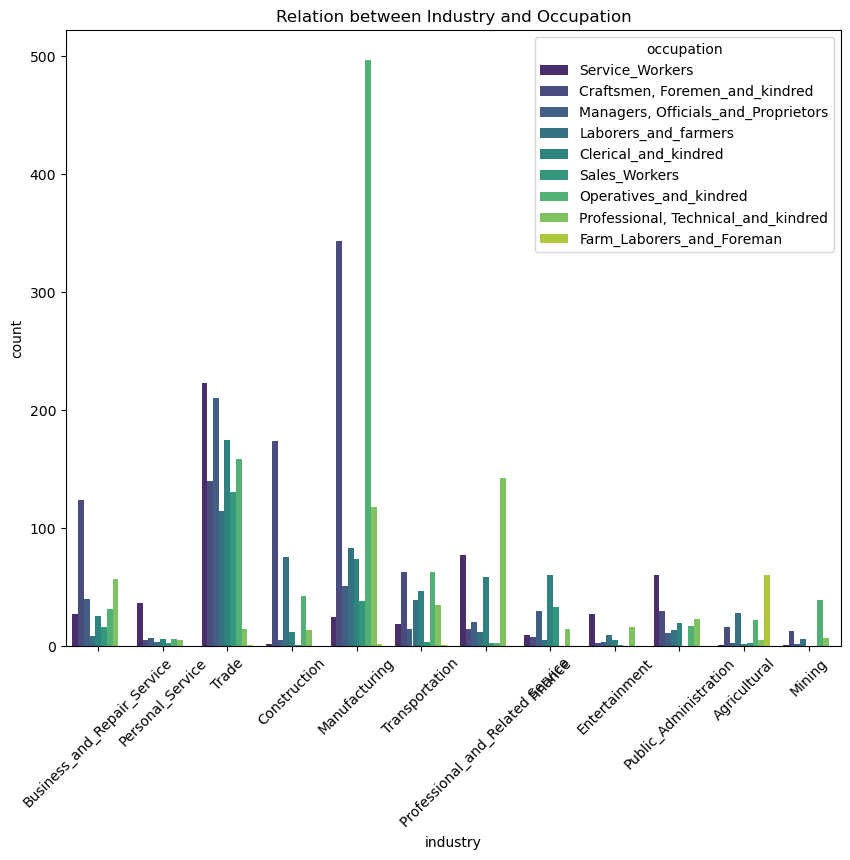

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='industry', hue='occupation', data=df, palette='viridis')
plt.title('Relation between Industry and Occupation')
plt.xticks(rotation=45)




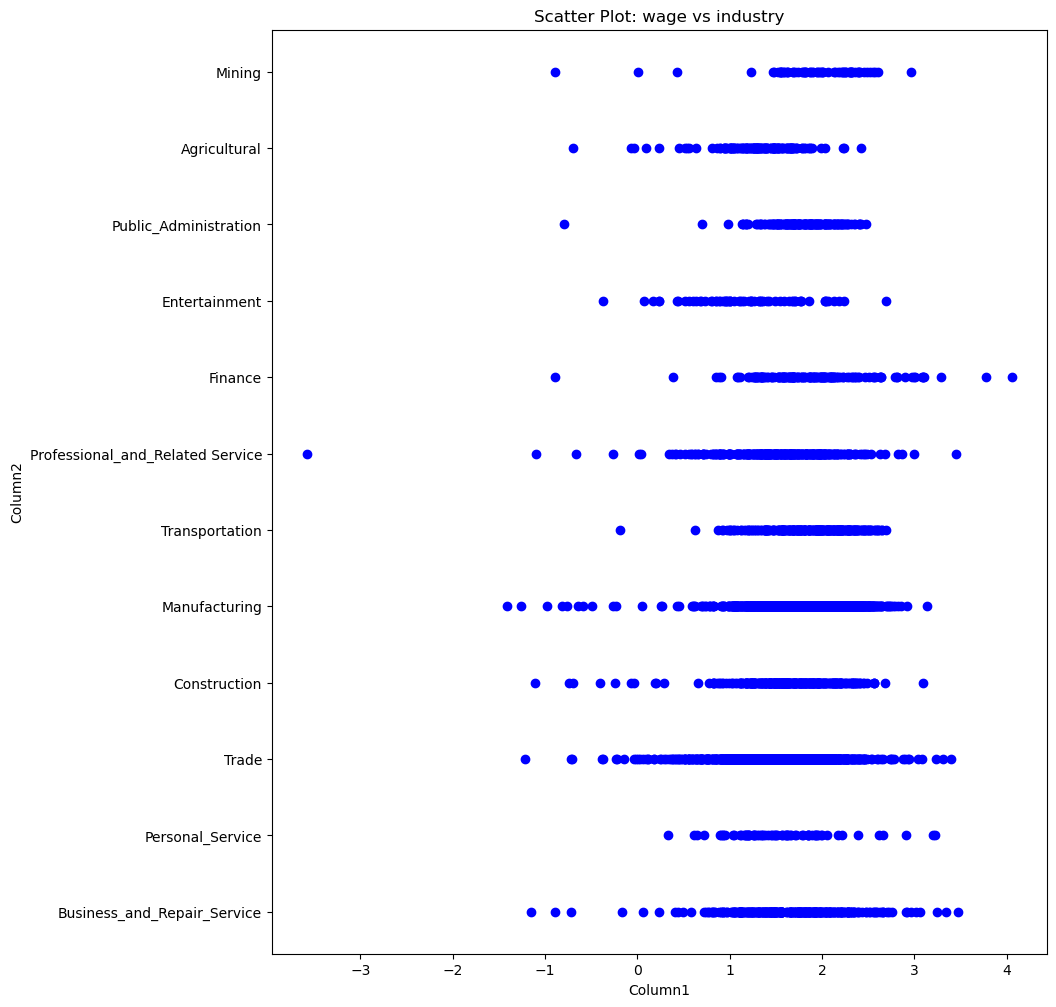

In [600]:
plt.figure(figsize=(10, 12))
plt.scatter(df['wage'], df['industry'], color='blue')
plt.title('Scatter Plot: wage vs industry')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

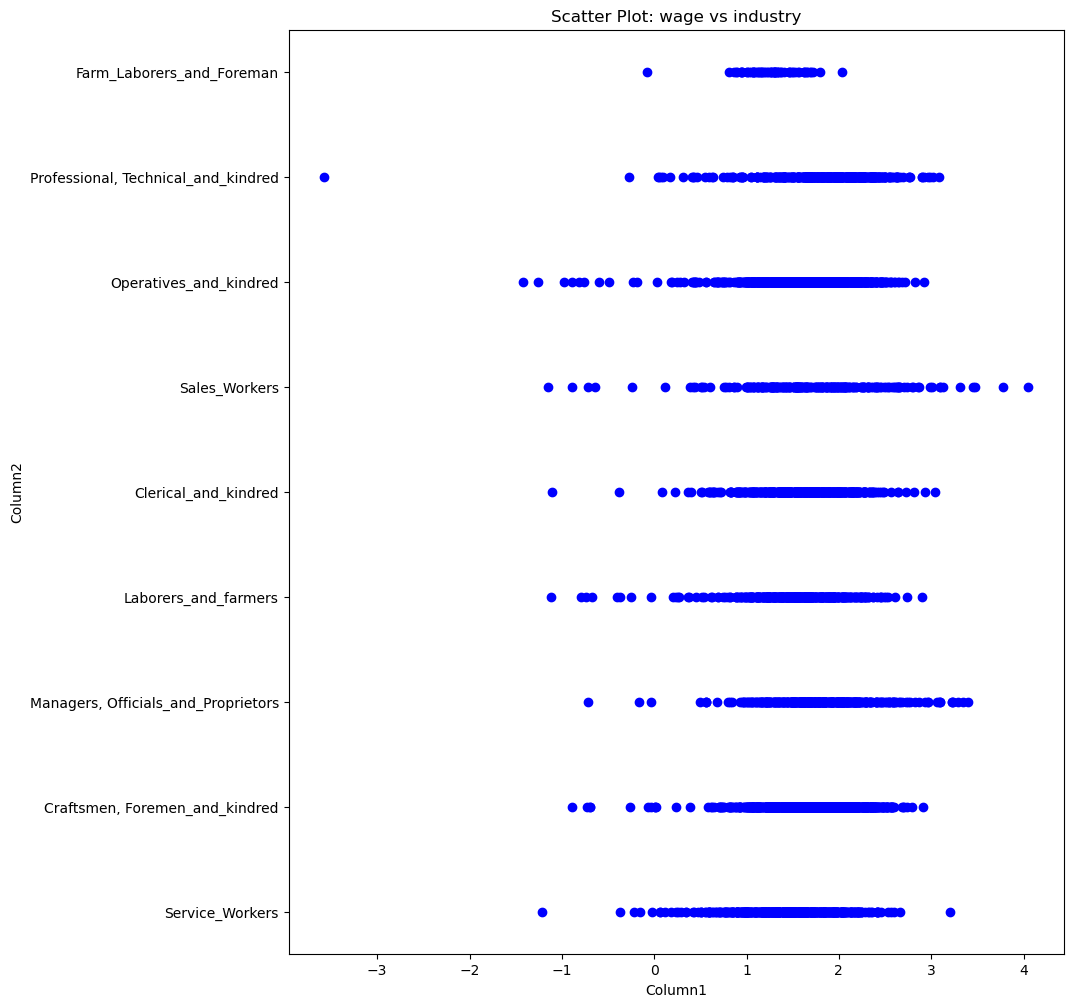

In [601]:
plt.figure(figsize=(10, 12))
plt.scatter(df['wage'], df['occupation'], color='blue')
plt.title('Scatter Plot: wage vs industry')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

In [602]:

columns_to_encode = ['union', 'ethn', 'maried', 'health', 'industry', 'occupation']

label_encoders = {col: LabelEncoder() for col in columns_to_encode}

for col in columns_to_encode:
    df[col] = label_encoders[col].fit_transform(df[col])




In [603]:
df["residence"] = df["residence"].map({"south": 1, "nothern_central": 2,"north_east": 3, "rural_area": 4})

In [604]:
df.head()


,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1980,14,1,0,2,0,0,1.197540,1,8,3.0
1,1981,14,2,1,2,0,0,1.853060,7,8,3.0
2,1982,14,3,0,2,0,0,1.344462,1,8,3.0
3,1983,14,4,0,2,0,0,1.433213,1,8,3.0
4,1984,14,5,0,2,0,0,1.568125,7,1,3.0


In [605]:
df['residence'].value_counts()

residence
1.0    1333
2.0     964
3.0     733
4.0      85
Name: count, dtype: int64

In [606]:
df.isnull().sum()

year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

<Axes: >

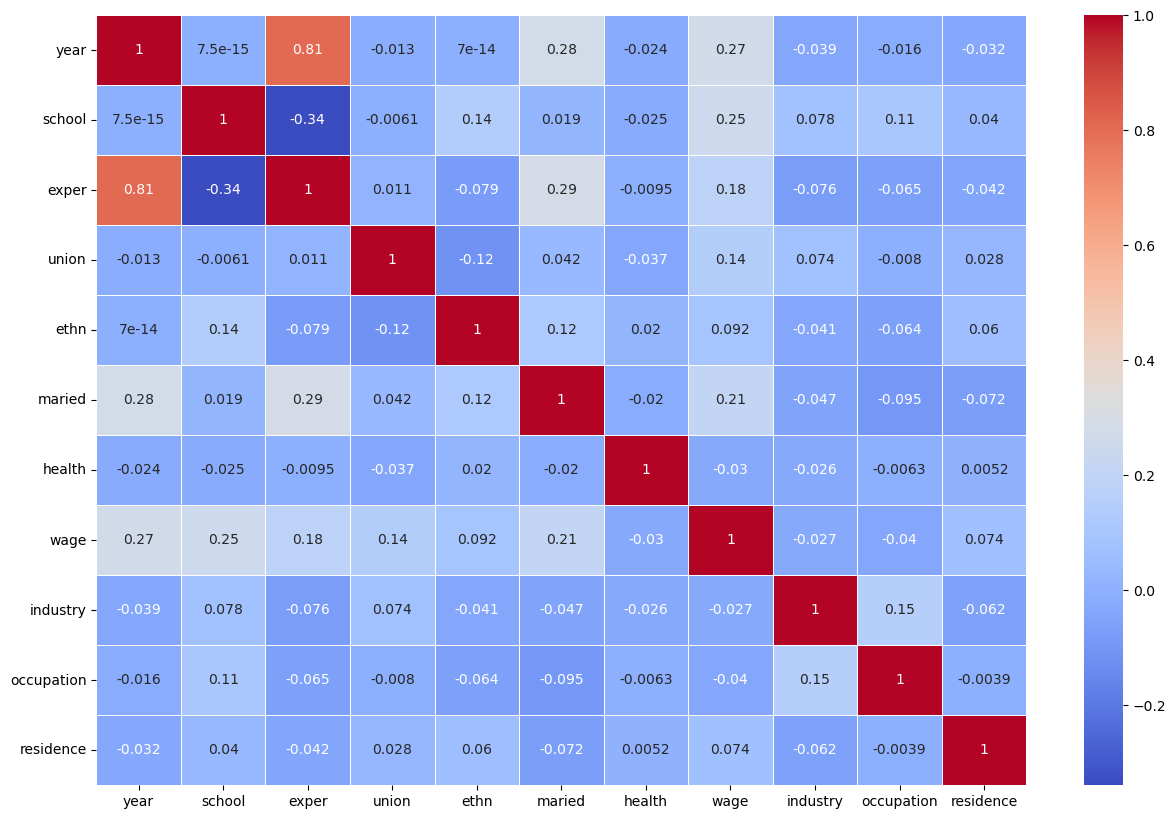

In [607]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

In [608]:
# check how many vare are negative in df.wage
df[df['wage'] < 0].value_counts().sum()

27

In [609]:
df.shape

(4360, 11)

In [610]:
df1 = df[df['wage'] > 0]

In [611]:
df1.shape

(4317, 11)

In [612]:
df1.wage.describe()

count    4317.000000
mean        1.671902
std         0.480092
min         0.004076
25%         1.363681
50%         1.678757
75%         1.994610
max         4.051860
Name: wage, dtype: float64

<Axes: >

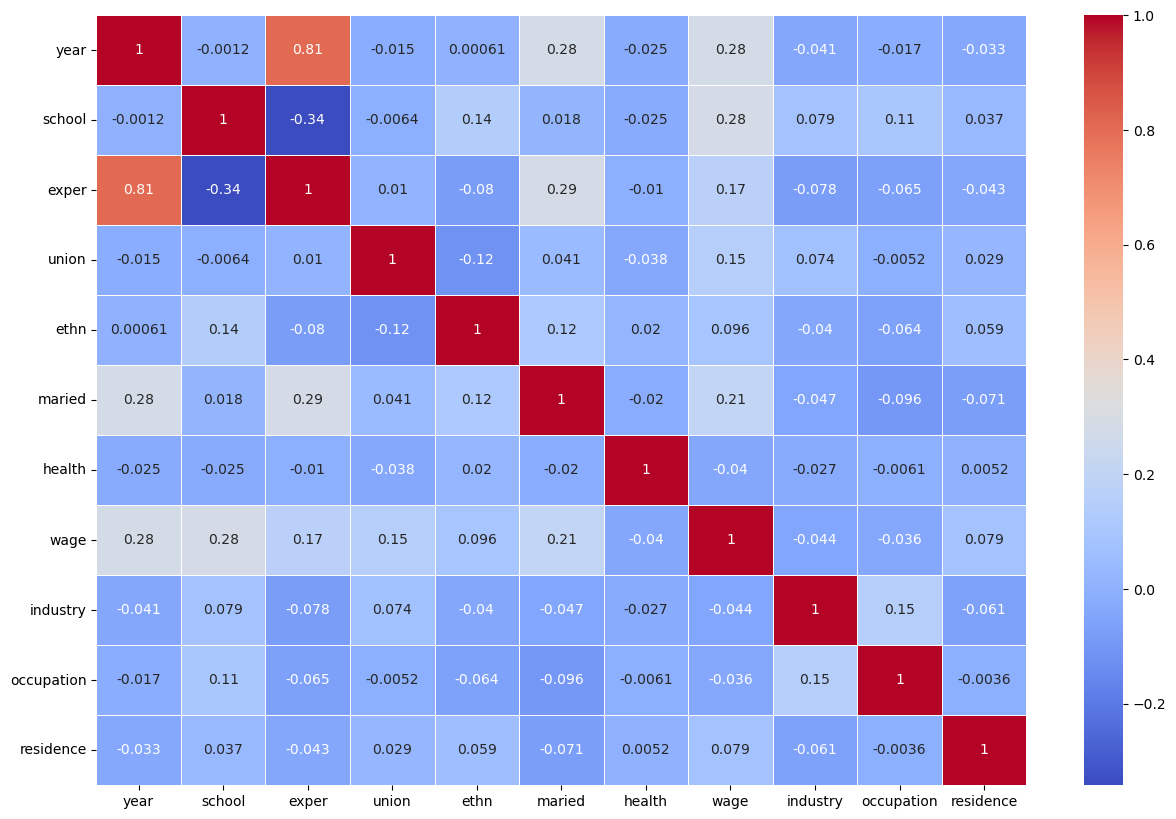

In [613]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

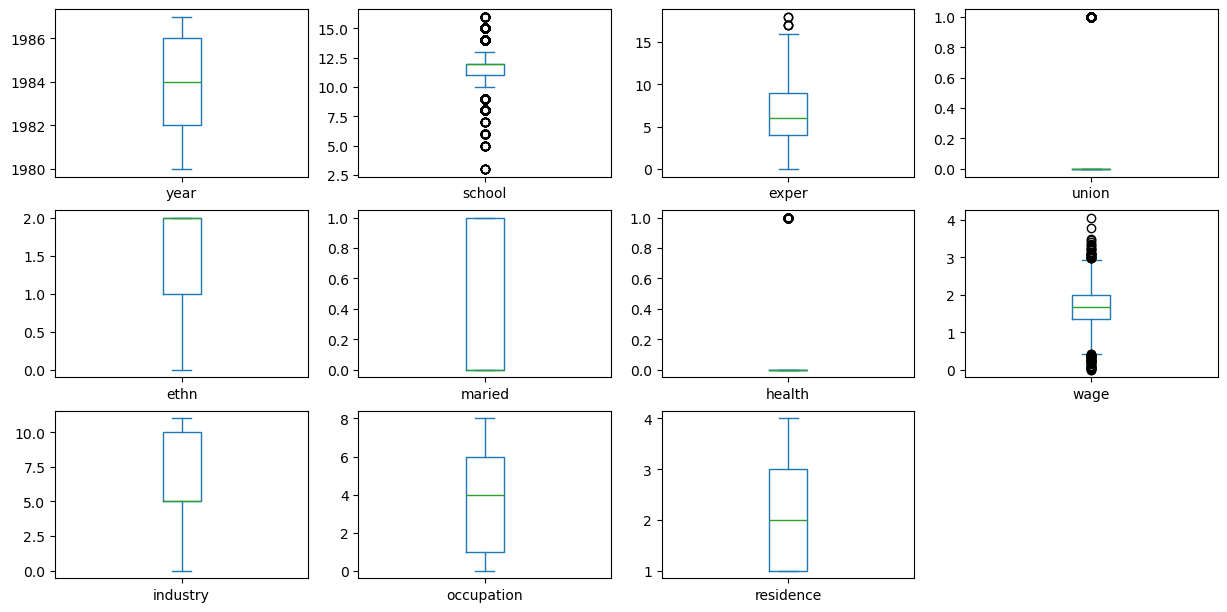

In [614]:
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [615]:
df1.isnull().sum()

year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1229
dtype: int64

In [616]:
df2 = df1.dropna()
df2.isnull().sum()

year          0
school        0
exper         0
union         0
ethn          0
maried        0
health        0
wage          0
industry      0
occupation    0
residence     0
dtype: int64

In [617]:
df2.shape

(3088, 11)

<Axes: >

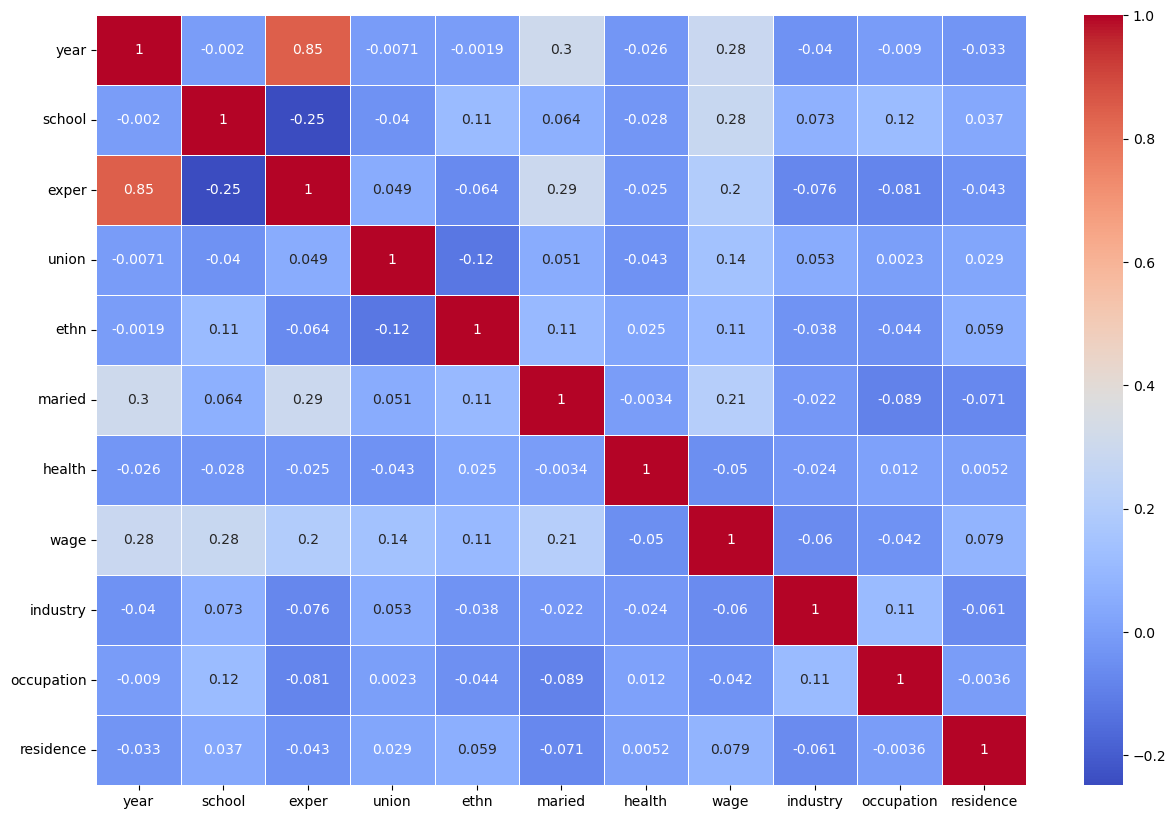

In [618]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

In [ ]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)



In [620]:
df2_scaled.head()

,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,-1.514254,1.331089,-1.985668,-0.576353,0.522241,-0.85325,-0.126979,-0.982703,-1.671069,1.567409,1.308235
1,-1.077366,1.331089,-1.612168,1.735047,0.522241,-0.85325,-0.126979,0.376750,0.131432,1.567409,1.308235
2,-0.640477,1.331089,-1.238669,-0.576353,0.522241,-0.85325,-0.126979,-0.678009,-1.671069,1.567409,1.308235
3,-0.203589,1.331089,-0.865169,-0.576353,0.522241,-0.85325,-0.126979,-0.493951,-1.671069,1.567409,1.308235
4,0.233300,1.331089,-0.491670,-0.576353,0.522241,-0.85325,-0.126979,-0.214164,0.131432,-1.087643,1.308235


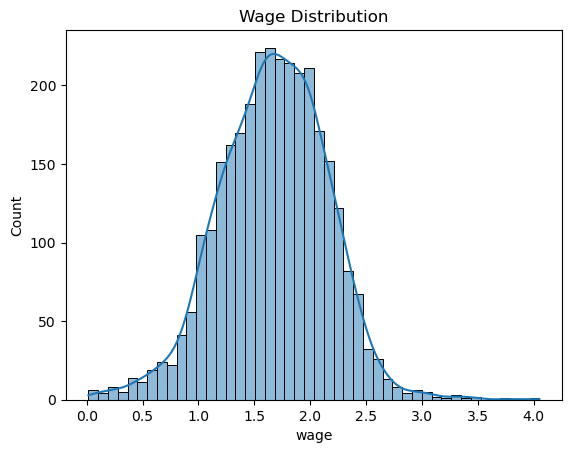

In [622]:
sns.histplot(df2['wage'], kde=True)
plt.title('Wage Distribution')
plt.show()
